In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils

## Import coffea files -- signal and background

In [2]:
prefix = './coffea/skimmed/'

suffix = 'ABCD_SR_goodvtx_v11'

In [3]:
# Signal
sig_histo = util.load(f'{prefix}/signal_{suffix}.coffea')[0]

In [4]:
# Background
#bkg_histo = util.load(f'{prefix}/bkg_{suffix}.coffea')[0]

In [5]:
#sig_histo2 = util.load(f'{prefix}/signal_BDT_ABCD_goodvtx_v10_NJetG0L3_OSSF.coffea')[0]

## Signal

In [4]:
sig_samples = list(sig_histo['cutflow'].keys())
si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples}, orient='index')

In [5]:
cutnames = utils.get_signal_list_of_cuts(sig_histo)
cutnames

['Preselections',
 '0 < NJet < 3',
 'n(good vertex) > 0',
 'Leading jet pT > 80 GeV',
 'Leading jet |eta| < 2.4',
 'dPhi(MET,leading jet) > 2.0',
 'dPhi(MET,all jets) > 0.75',
 'OSSF',
 'theta < 70',
 'BDT']

In [6]:
# Efficiency
pd.options.display.float_format = '{:,.6f}'.format
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow')

In [7]:
table = eff_cutflow
table.columns = cutnames

In [8]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_Efficiency'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_Efficiency.csv


In [9]:
# Weighted event count
pd.options.display.float_format = '{:,.4f}'.format
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

In [10]:
table = cts_cutflow
table.columns = cutnames

In [11]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,0 < NJet < 3,n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 70,BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,44.1691,41.8661,27.5180,27.4900,26.5657,26.5657,26.2251,25.5668,21.3732,10.1356
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,"1,156.9315","1,103.4899",666.7773,666.1743,642.8489,642.8489,635.0341,617.6829,546.6917,304.2401
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,"1,457.7156","1,391.1330",827.0445,825.9792,797.3672,797.3672,787.3198,767.1020,689.5404,393.0013
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,74.7132,70.8140,45.9089,45.8901,44.1806,44.1744,43.5820,42.4655,37.1571,20.6126
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,"1,964.2733","1,881.3989","1,102.7526","1,102.0333","1,064.7355","1,064.7355","1,050.8564","1,018.2555",934.1113,552.6471
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,"2,725.2304","2,577.6066","1,478.2941","1,477.9960","1,424.9048","1,424.9048","1,406.4192","1,361.3700","1,261.7544",777.7470
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,"1,620.1785","1,553.0300",714.5297,714.5297,687.9354,687.9354,680.3314,656.2454,629.6533,425.6844
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"33,765.0692","32,297.8427","11,685.7826","11,685.7826","11,173.1411","11,173.1411","10,978.4487","10,359.8293","9,688.3497","5,126.9630"
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,167.4818,159.4783,107.2824,107.2824,103.1451,103.1451,102.3719,99.0149,92.0322,59.4500
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1,403.5456,385.4708,244.8587,244.4996,236.3616,236.3616,232.8919,227.1468,215.4191,145.3536


In [12]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_EventCount_Weighted'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_EventCount_Weighted.csv


In [13]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [14]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [15]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_Raw'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_Raw.csv


['Preselections', '0 < NJet < 3', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_1_m5to40.png


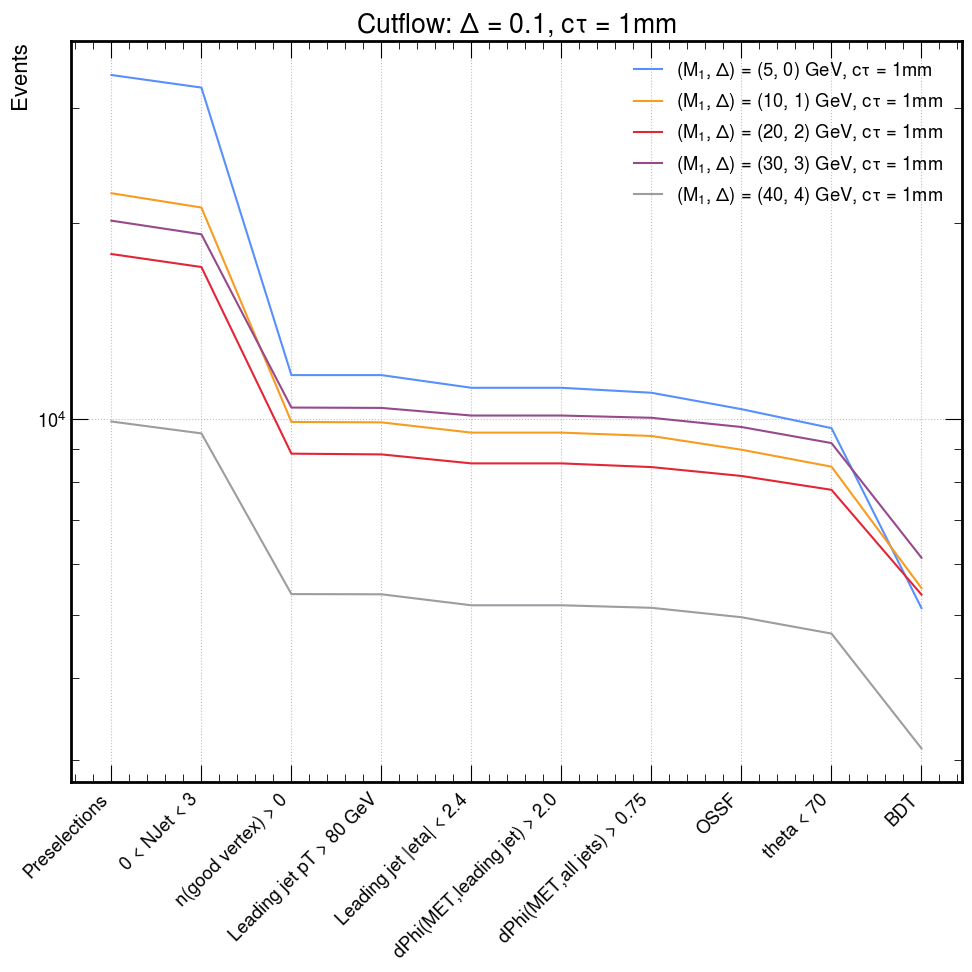

['Preselections', '0 < NJet < 3', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_10_m5to40.png


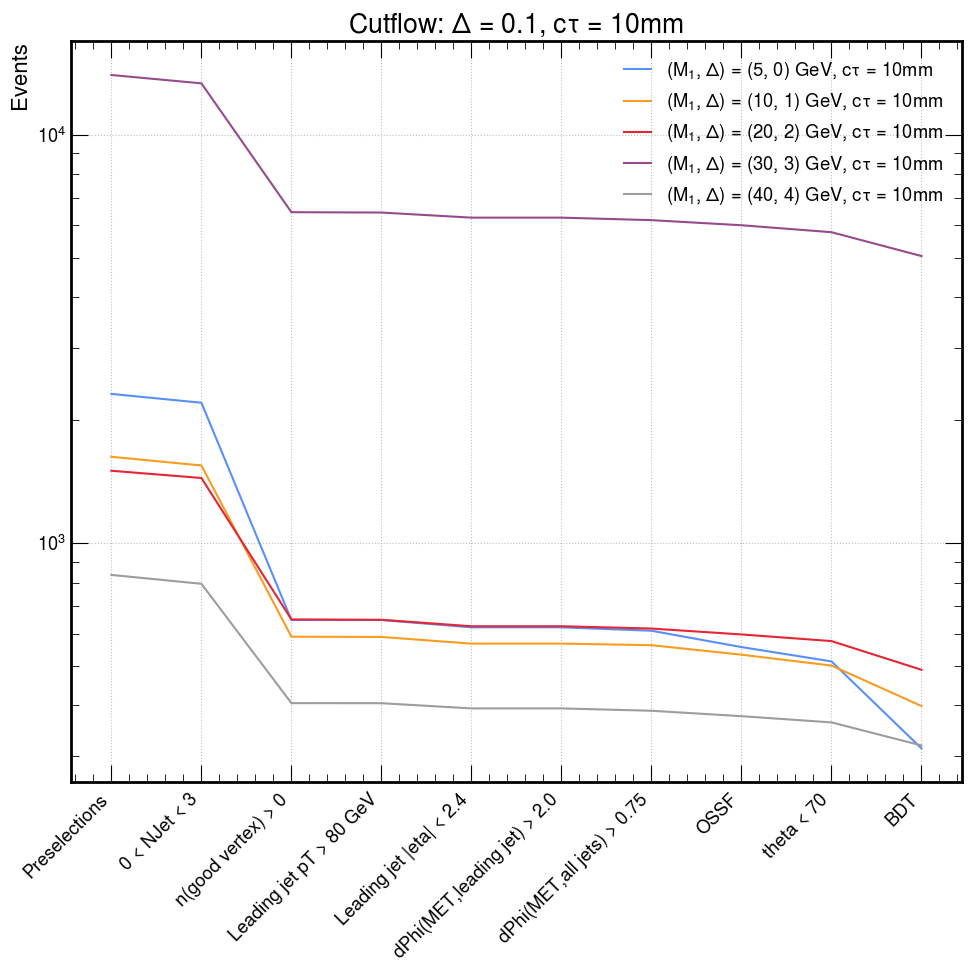

['Preselections', '0 < NJet < 3', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_100_m5to40.png


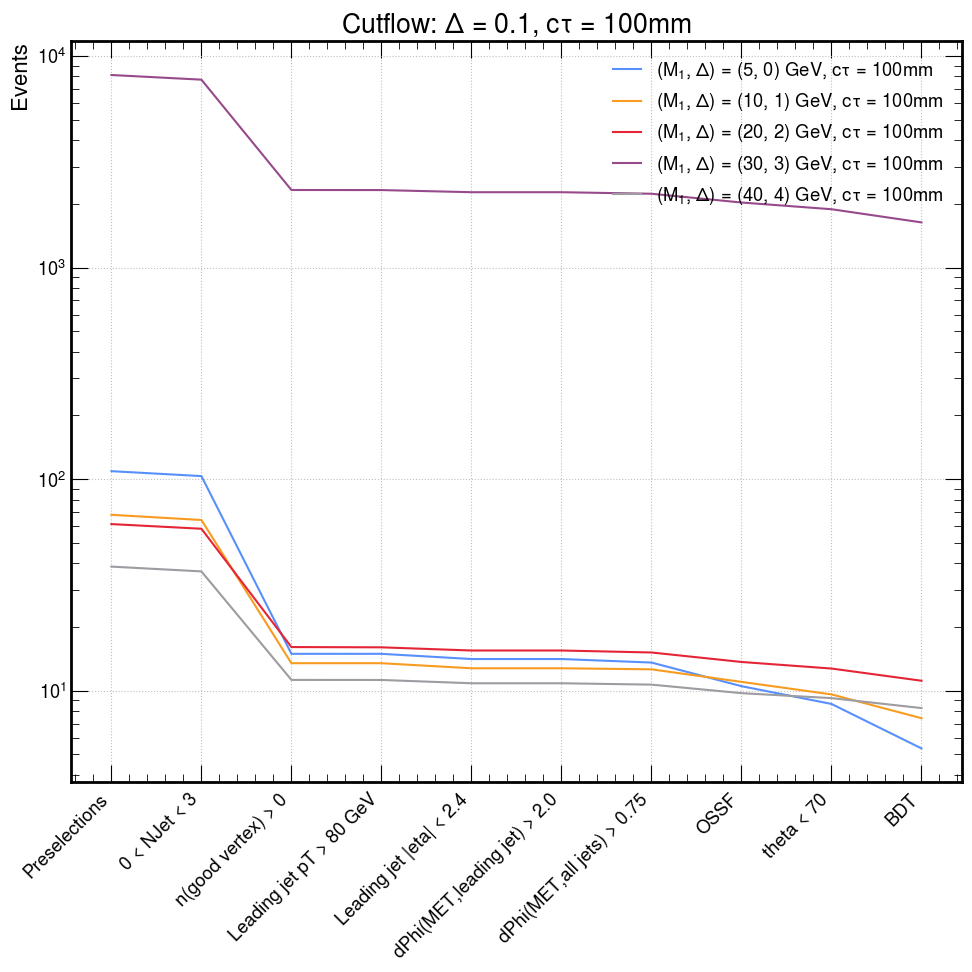

['Preselections', '0 < NJet < 3', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_1_m5to40.png


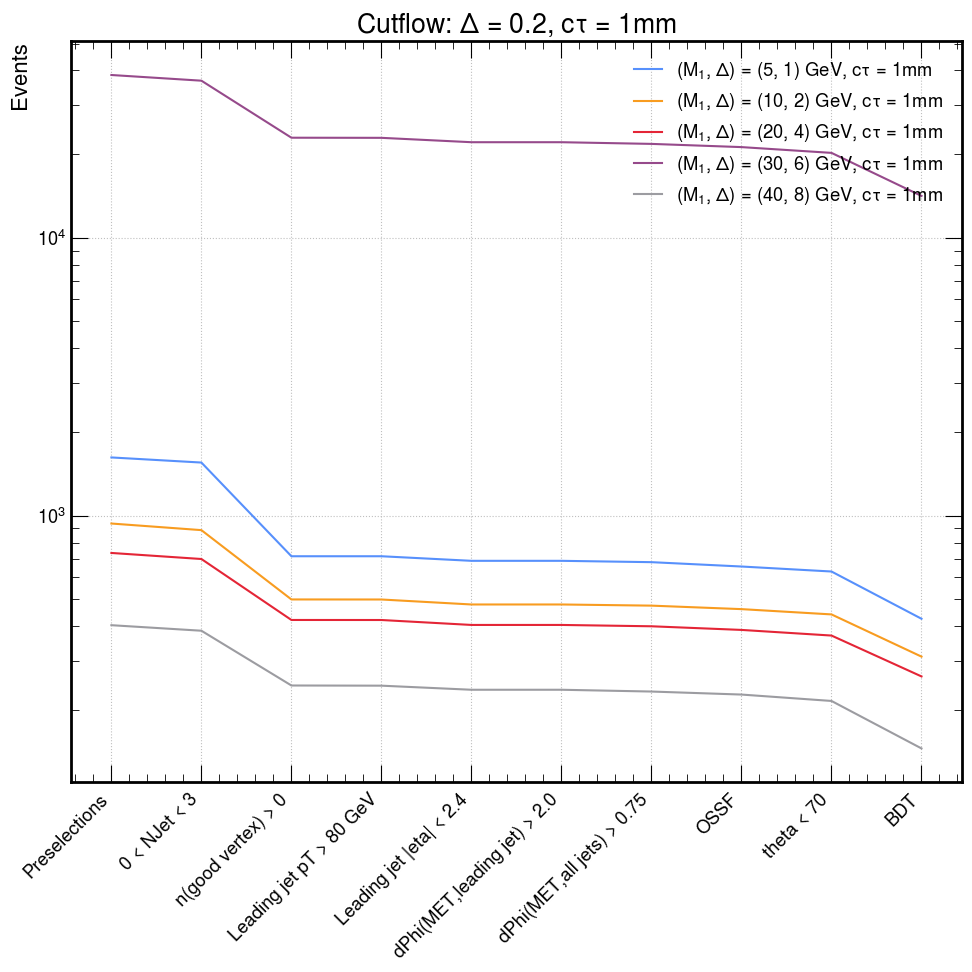

['Preselections', '0 < NJet < 3', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_10_m5to40.png


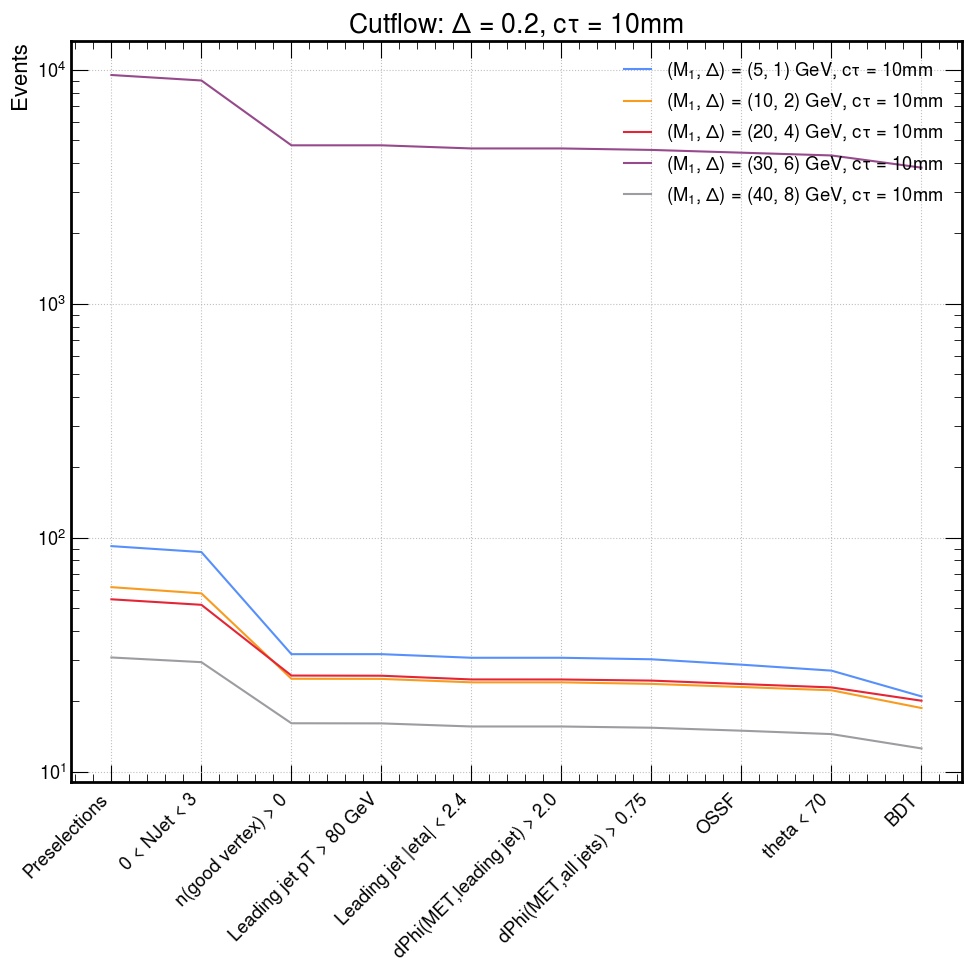

['Preselections', '0 < NJet < 3', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_100_m5to40.png


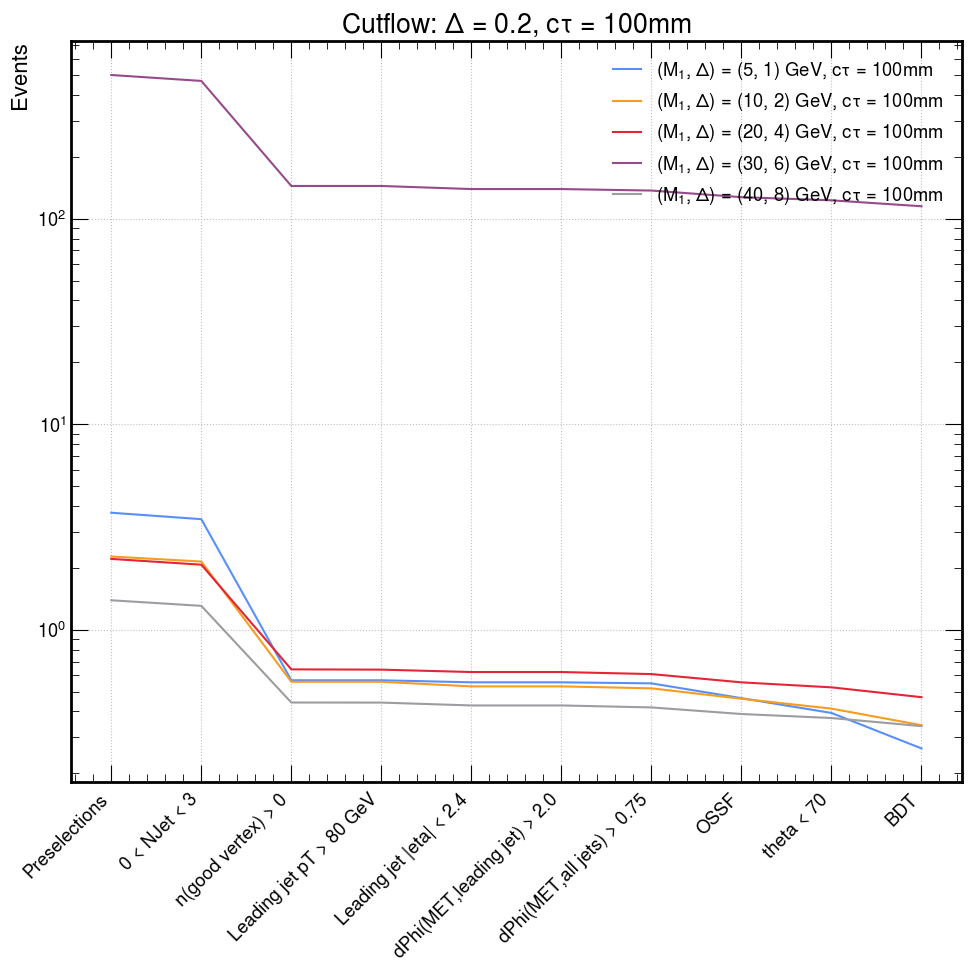

In [16]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [5, 10, 20, 30, 40],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_SR_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m5to40.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

['Preselections', '0 < NJet < 3', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_1_m50to100.png


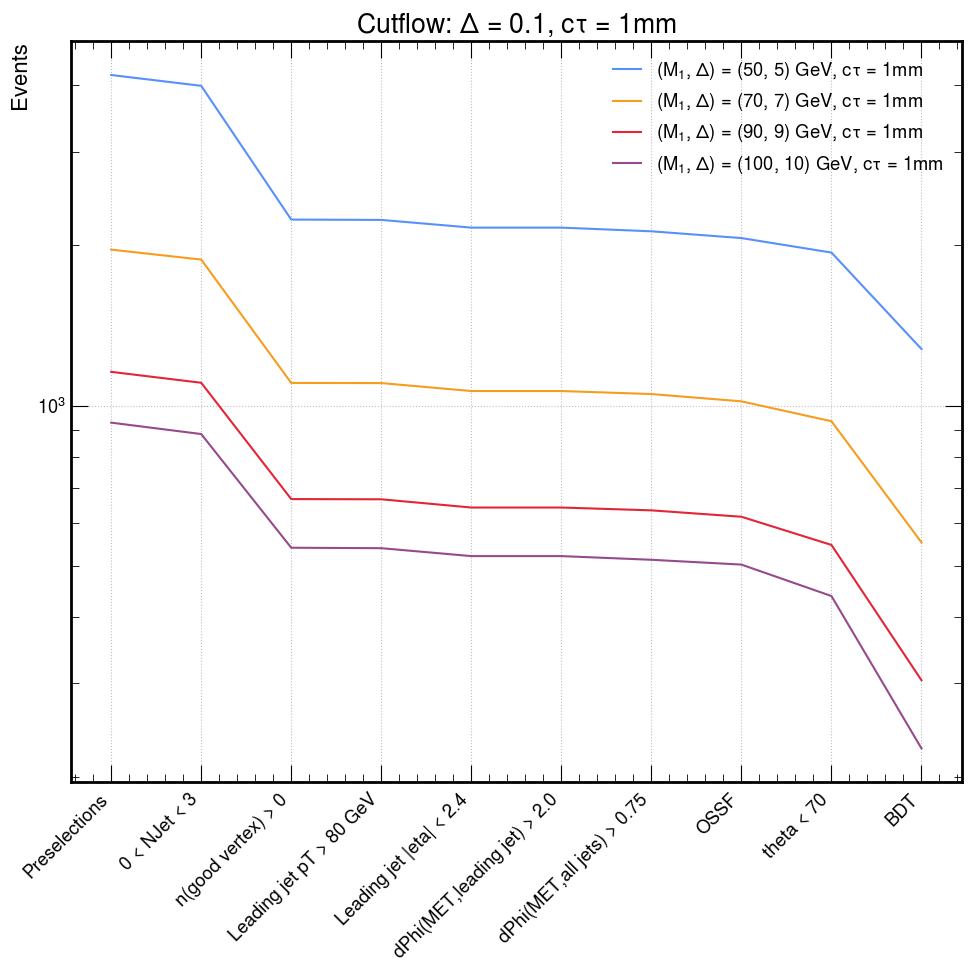

['Preselections', '0 < NJet < 3', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_10_m50to100.png


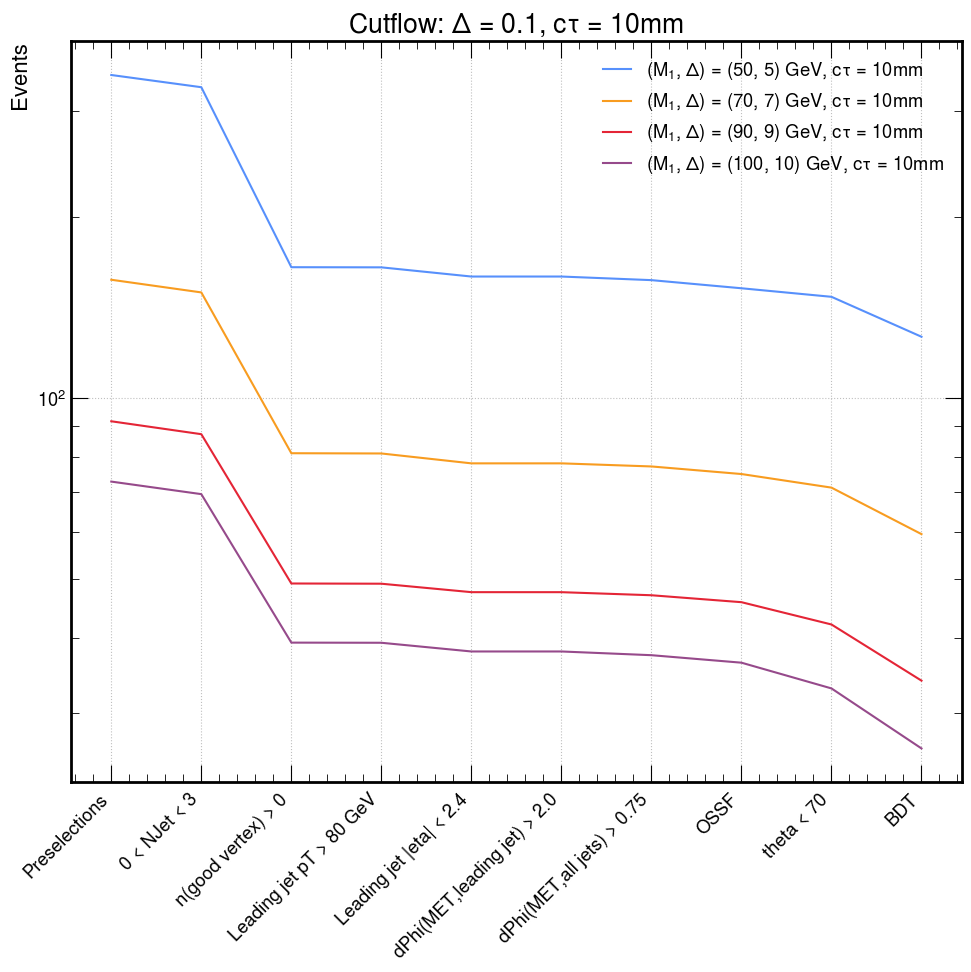

['Preselections', '0 < NJet < 3', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_100_m50to100.png


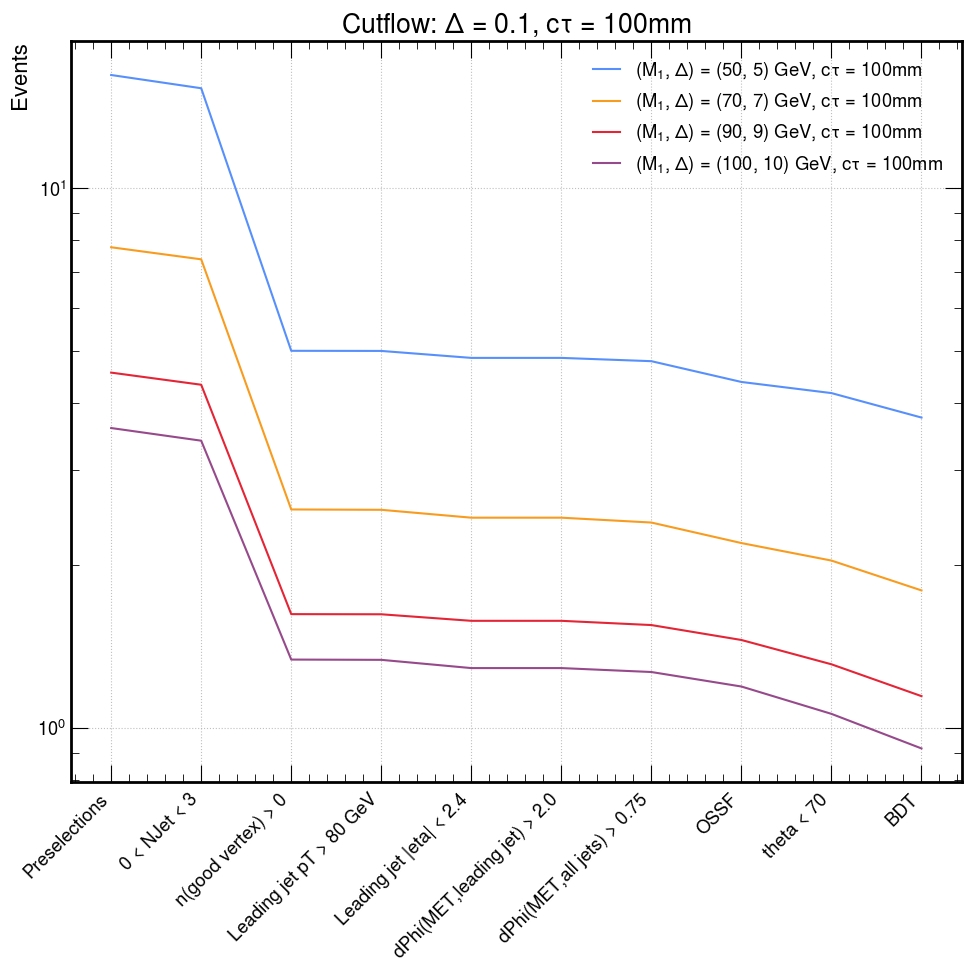

['Preselections', '0 < NJet < 3', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_1_m50to100.png


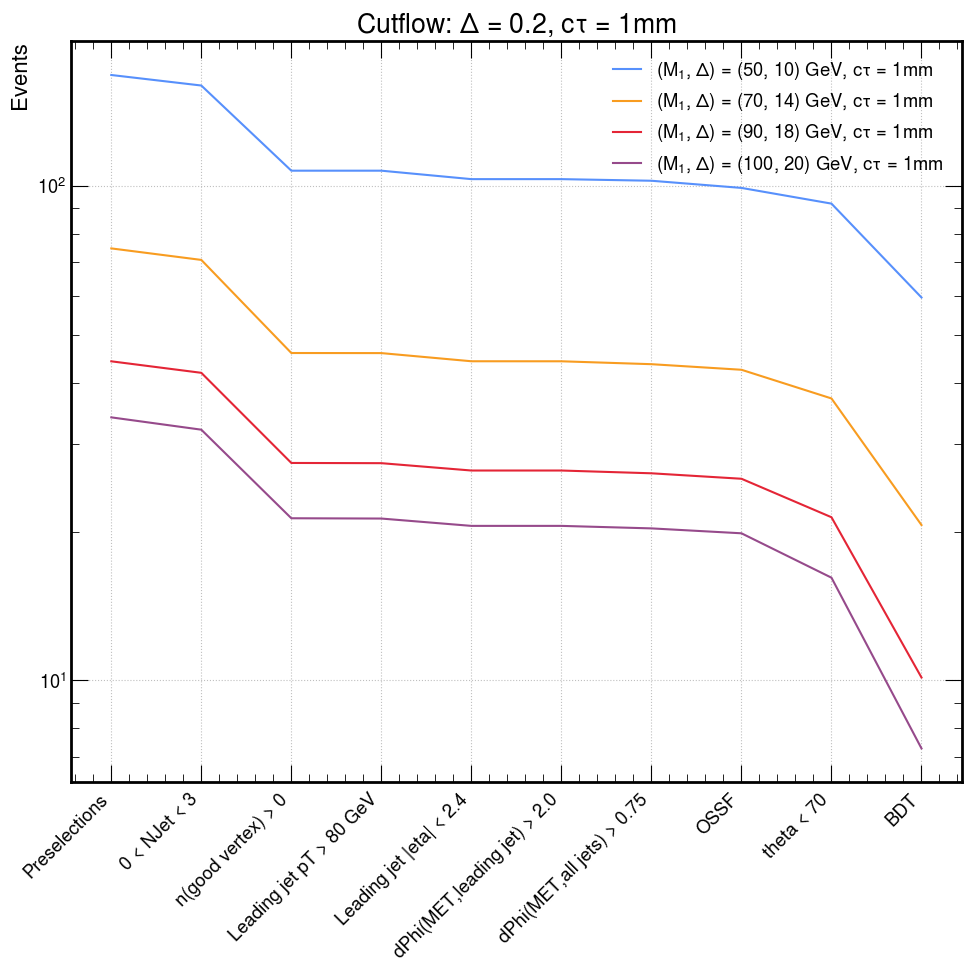

['Preselections', '0 < NJet < 3', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_10_m50to100.png


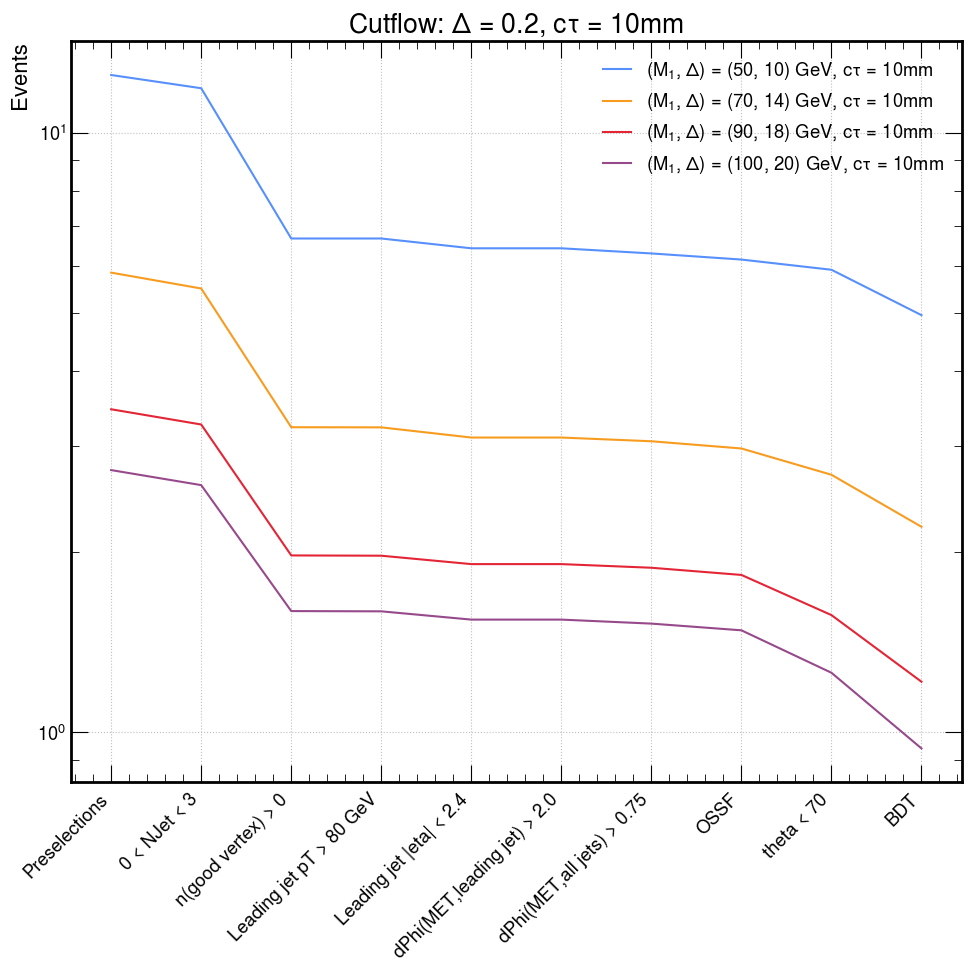

['Preselections', '0 < NJet < 3', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_100_m50to100.png


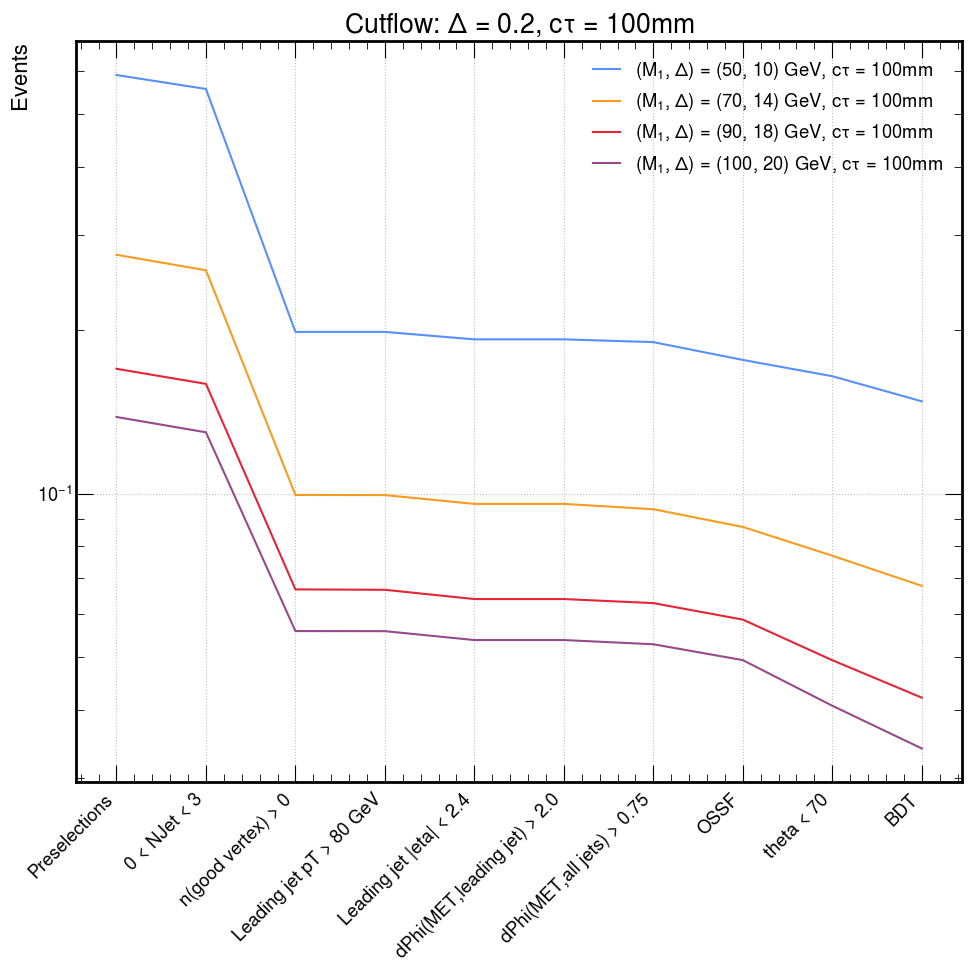

In [17]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [50, 70, 90, 100],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_SR_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m50to100.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

## Signal purity

In [20]:
purity_v11 = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched')

In [21]:
purity_v11_reco = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched_fromReco')

In [22]:
purity_v10 = utils.get_signal_cutflow_dict(sig_histo2, 'cutflow_vtx_matched')

In [23]:
purity_v10_reco = utils.get_signal_cutflow_dict(sig_histo2, 'cutflow_vtx_matched_fromReco')

In [24]:
ct = 10
delta = 0.2

In [25]:
table = purity_v11

points = ((si["ctau"] == ct) & (si['delta'] == delta))

df = table.loc[list(si[points].name)]
df = utils.add_signal_info_to_df(df)

purity_v11_beforeOSSF = df['dPhi(MET,all jets) > 0.75'].to_list()
purity_v11_afterOSSF = df['OSSF'].to_list()
m_list = df['m1'].to_list()

In [26]:
table = purity_v10

points = ((si["ctau"] == ct) & (si['delta'] == delta))

df = table.loc[list(si[points].name)]
df = utils.add_signal_info_to_df(df)

purity_v10_beforeOSSF = df['dPhi(MET,all jets) > 0.75'].to_list()
purity_v10_afterOSSF = df['OSSF'].to_list()
m_list = df['m1'].to_list()

Text(0.5, 1.0, '$\\Delta$=0.2, 10mm')

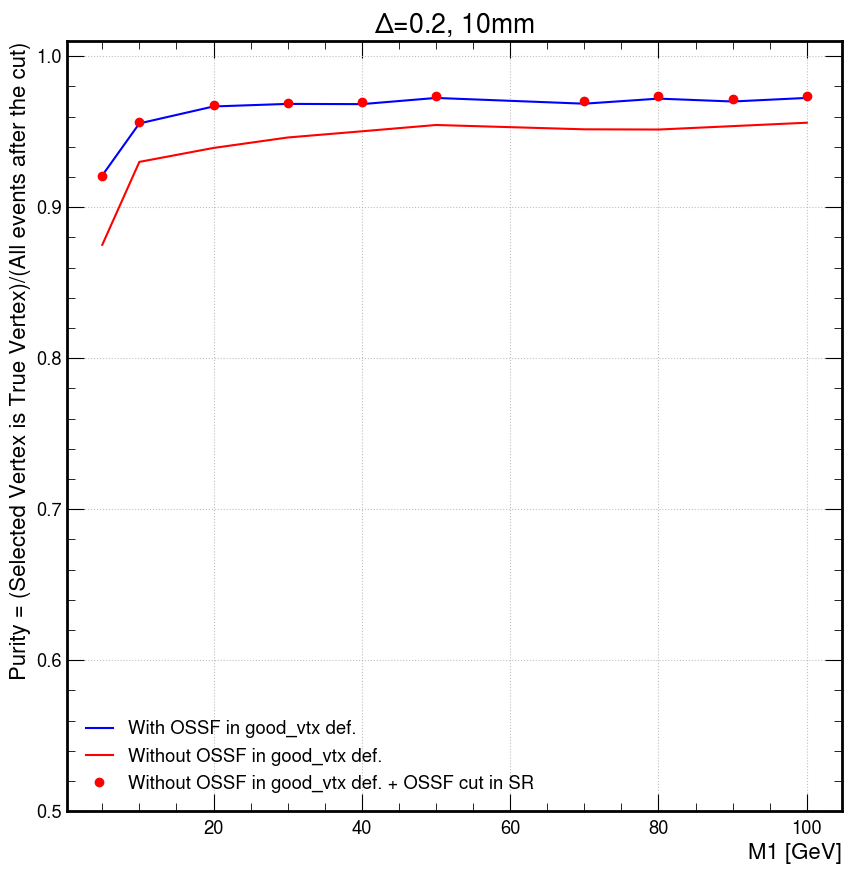

In [27]:
plt.plot(m_list, purity_v10_beforeOSSF, '-', color='blue', label='With OSSF in good_vtx def.')
plt.plot(m_list, purity_v11_beforeOSSF, '-', color='red', label='Without OSSF in good_vtx def.')
plt.plot(m_list, purity_v11_afterOSSF, 'o', color='red', label='Without OSSF in good_vtx def. + OSSF cut in SR')


plt.grid()
plt.ylim([0.5,1.01])

plt.xlabel('M1 [GeV]')
plt.ylabel('Purity = (Selected Vertex is True Vertex)/(All events after the cut)')

plt.legend()

plt.title(rf"$\Delta$={delta}, {ct}mm")

In [28]:
table = purity_v11_reco

points = ((si["ctau"] == ct) & (si['delta'] == delta))

df = table.loc[list(si[points].name)]
df = utils.add_signal_info_to_df(df)

purity_v11_reco_beforeOSSF = df['dPhi(MET,all jets) > 0.75'].to_list()
purity_v11_reco_afterOSSF = df['OSSF'].to_list()
m_list = df['m1'].to_list()

In [29]:
table = purity_v10_reco

points = ((si["ctau"] == ct) & (si['delta'] == delta))

df = table.loc[list(si[points].name)]
df = utils.add_signal_info_to_df(df)

purity_v10_reco_beforeOSSF = df['dPhi(MET,all jets) > 0.75'].to_list()
purity_v10_reco_afterOSSF = df['OSSF'].to_list()
m_list = df['m1'].to_list()

Text(0.5, 1.0, '$\\Delta$=0.2, 10mm')

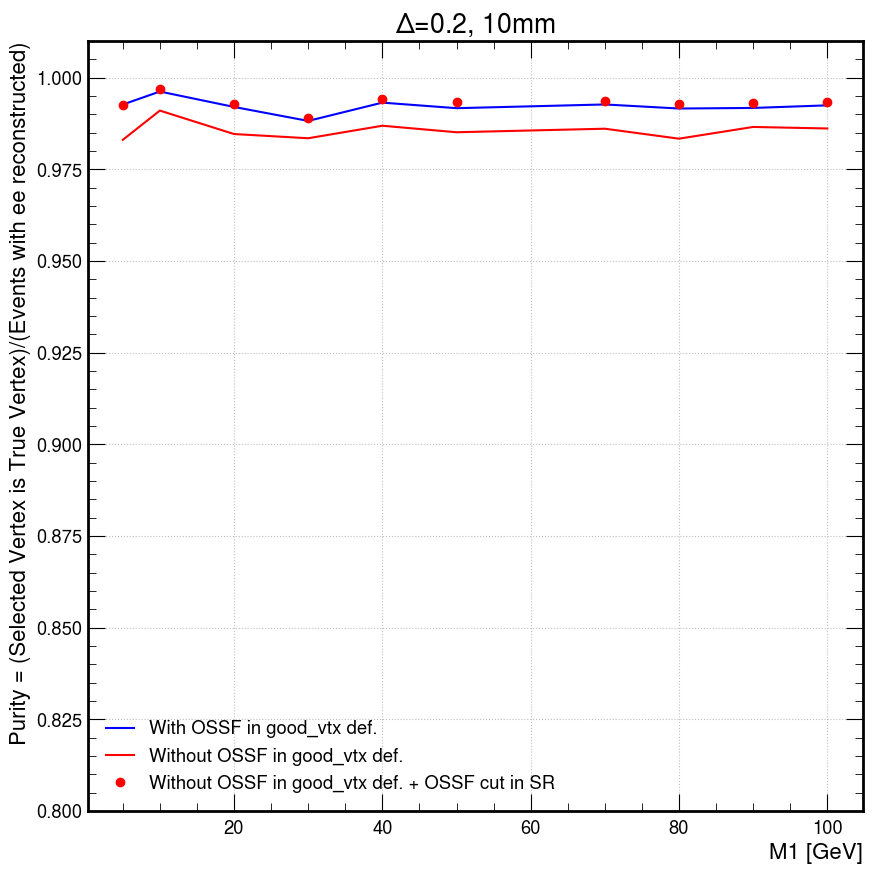

In [30]:
plt.plot(m_list, purity_v10_reco_beforeOSSF, '-', color='blue', label='With OSSF in good_vtx def.')
plt.plot(m_list, purity_v11_reco_beforeOSSF, '-', color='red', label='Without OSSF in good_vtx def.')
plt.plot(m_list, purity_v11_reco_afterOSSF, 'o', color='red', label='Without OSSF in good_vtx def. + OSSF cut in SR')

plt.grid()
plt.ylim([0.8,1.01])

plt.xlabel('M1 [GeV]')
plt.ylabel('Purity = (Selected Vertex is True Vertex)/(Events with ee reconstructed)')

plt.legend()

plt.title(rf"$\Delta$={delta}, {ct}mm")

## Background

In [31]:
# efficiency
pd.options.display.float_format = '{:,.8f}'.format

bkg_eff_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow')
bkg_eff_df

,Preselections,n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 90,BDT
QCD,0.00000249,0.00000001,0.00000001,0.00000001,0.00000001,0.00000000,0.00000000,0.00000000,0.00000000
DY,0.00018701,0.00001151,0.00001141,0.00001094,0.00001083,0.00000952,0.00000760,0.00000409,0.00000026
ZGamma,0.00032468,0.00001653,0.00001398,0.00001313,0.00001310,0.00001314,0.00000881,0.00000508,0.00000003
Top,0.00039885,0.00001298,0.00001210,0.00001090,0.00001077,0.00000985,0.00000627,0.00000334,0.00000009
Multiboson,0.00065832,0.00003441,0.00003004,0.00002763,0.00002678,0.00002517,0.00001774,0.00000845,0.00000000
WJets,0.00101318,0.00003720,0.00003665,0.00003480,0.00003459,0.00003180,0.00001672,0.00000861,0.00000024
ZJets,0.00242159,0.00007613,0.00007541,0.00007141,0.00007118,0.00006654,0.00003517,0.00001819,0.00000071
Total,0.00001696,0.00000054,0.00000052,0.00000049,0.00000049,0.00000044,0.00000024,0.00000013,0.00000000


In [32]:
# Save as csv
outdir = f'./csv/{suffix}/Cutflow/Efficiency/'
outname = f'Background_Efficiency'

df_to_save = bkg_eff_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/BDT_ABCD_goodvtx_v11_NJetG0L3_OSSF/Cutflow/Efficiency//Background_Efficiency.csv


In [33]:
# weighted event count
pd.options.display.float_format = '{:,.2f}'.format
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts', isLegacy = False)

bkg_cts_df.rename(columns={'n(good vertex) > 0': 'n(jet) > 2 && n(good vertex) > 0'})

,Preselections,n(jet) > 2 && n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 90,BDT
QCD,"53,432.27",275.55,275.55,214.93,206.03,32.90,16.05,0.00,0.00
DY,"5,819.49",358.21,355.08,340.58,337.02,296.39,236.56,127.32,8.13
ZGamma,"1,665.13",84.77,71.71,67.31,67.20,67.41,45.16,26.04,0.16
Top,"26,174.93",851.60,793.75,715.64,706.97,646.17,411.66,219.46,6.15
Multiboson,"4,588.16",239.80,209.34,192.59,186.67,175.45,123.66,58.88,0.00
WJets,"214,692.24","7,883.42","7,765.40","7,373.78","7,330.01","6,739.24","3,542.39","1,824.85",50.60
ZJets,"63,745.58","2,003.91","1,985.06","1,879.87","1,873.73","1,751.69",925.74,478.94,18.73
Total,"370,117.80","11,697.26","11,455.88","10,784.71","10,707.63","9,709.25","5,301.23","2,735.49",83.77


In [34]:
# Save to csv
outdir = f'./csv/{suffix}/Cutflow/EventCount_Weighted/'
outname = f'Background_EventCount_Weighted'

df_to_save = bkg_cts_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/BDT_ABCD_goodvtx_v11_NJetG0L3_OSSF/Cutflow/EventCount_Weighted//Background_EventCount_Weighted.csv


In [35]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df

,Preselections,n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 90,BDT
QCD,31490,92,92,90,88,6,2,0,0
DY,296131,7134,7103,6985,6640,4563,3734,1970,100
ZGamma,6506,343,307,292,279,252,158,85,1
Top,703976,21950,20178,18131,17729,16114,10382,5535,128
Multiboson,25187,1310,1106,1027,966,905,641,305,0
WJets,1177020,21199,20944,20158,19793,16850,8815,4576,130
ZJets,738994,12563,12452,11965,11824,10144,5327,2756,108
Total,2979304,64591,62182,58648,57319,48834,29059,15227,467


In [36]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df.rename(columns={'n(good vertex) > 0': 'n(jet) > 2 && n(good vertex) > 0'})

,Preselections,n(jet) > 2 && n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 90,BDT
QCD,31490,92,92,90,88,6,2,0,0
DY,296131,7134,7103,6985,6640,4563,3734,1970,100
ZGamma,6506,343,307,292,279,252,158,85,1
Top,703976,21950,20178,18131,17729,16114,10382,5535,128
Multiboson,25187,1310,1106,1027,966,905,641,305,0
WJets,1177020,21199,20944,20158,19793,16850,8815,4576,130
ZJets,738994,12563,12452,11965,11824,10144,5327,2756,108
Total,2979304,64591,62182,58648,57319,48834,29059,15227,467


In [37]:
outdir = f'./csv/{suffix}/Cutflow/EventCount_Raw/'
outname = f'Background_EventCount_Raw'

df_to_save = bkg_cts_raw_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/BDT_ABCD_goodvtx_v11_NJetG0L3_OSSF/Cutflow/EventCount_Raw//Background_EventCount_Raw.csv


In [38]:
nBkg = bkg_cts_df.loc['Total'][-1]

print(f'Total number of backgrounds (weighted) after the last SR cut: {nBkg:.2f}')

Total number of backgrounds (weighted) after the last SR cut: 83.77


In [39]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df[bkg_cts_df.columns.values[-1]]).transpose(), pd.DataFrame(bkg_cts_raw_df[bkg_cts_df.columns.values[-1]]).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,QCD,DY,ZGamma,Top,Multiboson,WJets,ZJets,Total
Weighted Counts,0.00,8.13,0.16,6.15,0.00,50.60,18.73,83.77
Raw Counts,0.00,100.00,1.00,128.00,0.00,130.00,108.00,467.00


In [40]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df[bkg_cts_df.columns.values[-3]]).transpose(), pd.DataFrame(bkg_cts_raw_df[bkg_cts_df.columns.values[-3]]).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,QCD,DY,ZGamma,Top,Multiboson,WJets,ZJets,Total
Weighted Counts,16.05,236.56,45.16,411.66,123.66,"3,542.39",925.74,"5,301.23"
Raw Counts,2.00,"3,734.00",158.00,"10,382.00",641.00,"8,815.00","5,327.00","29,059.00"


Saved: ./plots/BDT_ABCD_goodvtx_v11_NJetG0L3_OSSF/cutflow//Cutflow_background.png


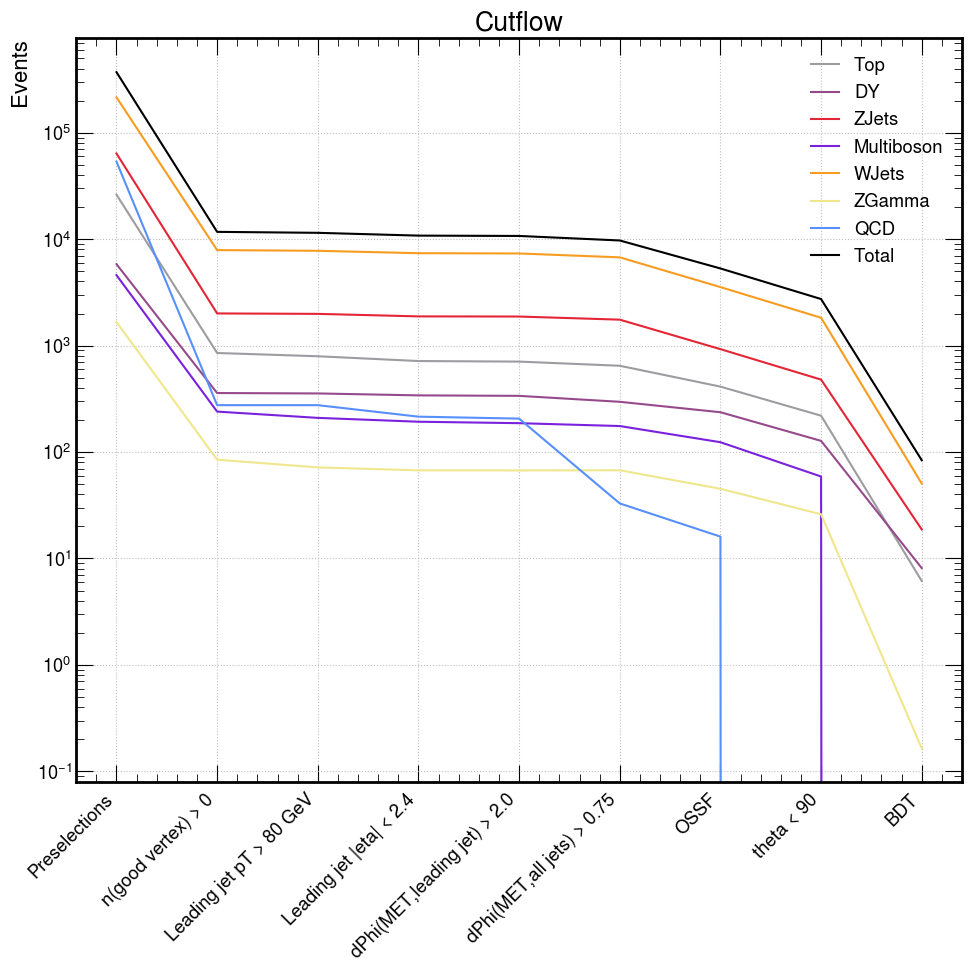

In [29]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': f'./plots/{suffix}/cutflow/',
    'outName': f'Cutflow_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

Saved: ./plots/BDT_ABCD_goodvtx_v11_NJetG0L3_OSSF/cutflow//Cutflow_background.png


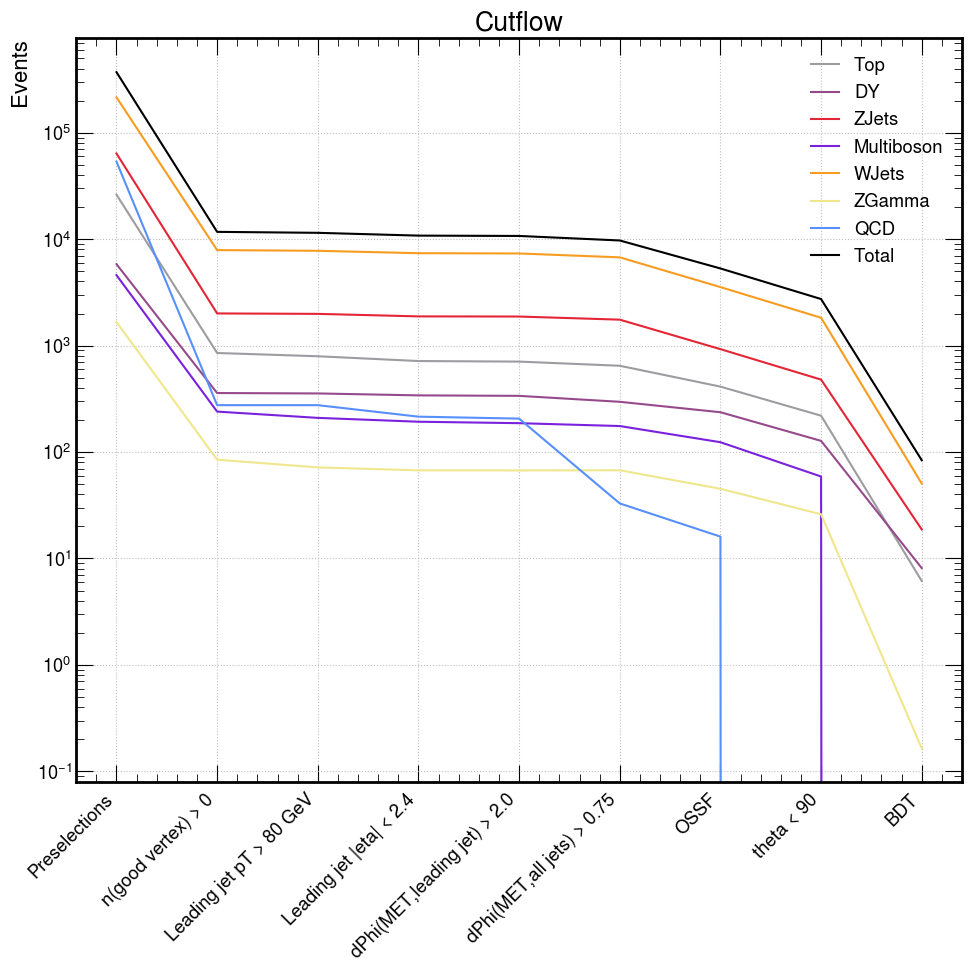

In [30]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': f'./plots/{suffix}/cutflow/',
    'outName': f'Cutflow_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

## S/B

In [31]:
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')
nBkg = bkg_cts_df.loc['Total'][-1]

nBkg

83.77390549330343

In [32]:
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')
table = cts_cutflow

cutnames = utils.get_signal_list_of_cuts(sig_histo)
table.columns = cutnames

In [33]:
pd.options.display.float_format = '{:,.4f}'.format


In [34]:
df = pd.DataFrame(table.loc[:, cutnames[-1]]) # last cut
df = utils.add_signal_info_to_df(df)
df

,BDT,m1,delta,ctau
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,6.3250,5.0000,0.1000,100.0000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,400.1640,5.0000,0.1000,10.0000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"7,247.7758",5.0000,0.1000,1.0000
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,536.5508,5.0000,0.2000,1.0000
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,23.3508,5.0000,0.2000,10.0000
...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10,1.0734,100.0000,0.2000,10.0000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,308.7564,100.0000,0.1000,1.0000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,0.9779,100.0000,0.1000,100.0000
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,9.9706,100.0000,0.2000,1.0000


In [35]:
# Missing rows
#df[ (df['m1'] == 60) & (df['delta'] == 0.2) ]

df.loc[len(df.index)] = [0, 60, 0.2, 1]
df.loc[len(df.index)] = [0, 60, 0.2, 10]
df.loc[len(df.index)] = [0, 60, 0.2, 100]
df.loc[len(df.index)] = [0, 80, 0.2, 1] 

df = df.sort_values(by=['m1']) # sort by m1

In [36]:
df = df.rename(columns={df.columns[0]: 'Signal'})

df['Background'] = nBkg
df['S/sqrt(B)'] = df['Signal'] / np.sqrt(df['Background'])

df = df[['m1', 'delta', 'ctau', 'Signal', 'Background', 'S/sqrt(B)']]

df

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.0000,0.1000,100.0000,6.3250,83.7739,0.6910
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.0000,0.1000,10.0000,400.1640,83.7739,43.7203
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,5.0000,0.1000,1.0000,"7,247.7758",83.7739,791.8636
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,5.0000,0.2000,1.0000,536.5508,83.7739,58.6214
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,5.0000,0.2000,10.0000,23.3508,83.7739,2.5512
...,...,...,...,...,...,...
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,100.0000,0.1000,1.0000,308.7564,83.7739,33.7335
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,100.0000,0.1000,100.0000,0.9779,83.7739,0.1068
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,100.0000,0.2000,1.0000,9.9706,83.7739,1.0893
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,100.0000,0.1000,10.0000,29.2401,83.7739,3.1947


In [37]:
outdir = './csv/SR_Yields/'
outname = f'SR_S_over_B'

df_to_save = df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/SR_Yields//SR_S_over_B.csv


In [38]:
ct = 1.0


In [39]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,5.0,0.1,1.0,"7,247.7758",83.7739,791.8636
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,10.0,0.1,1.0,"7,283.9510",83.7739,795.8159
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1,20.0,0.1,1.0,"6,961.0950",83.7739,760.5420
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1,30.0,0.1,1.0,"8,081.5284",83.7739,882.9561
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1,40.0,0.1,1.0,"4,099.3572",83.7739,447.8797
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,50.0,0.1,1.0,"1,645.4519",83.7739,179.7756
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,60.0,0.1,1.0,"1,021.3892",83.7739,111.5930
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,70.0,0.1,1.0,740.9489,83.7739,80.9532
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,80.0,0.1,1.0,525.7613,83.7739,57.4426
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,90.0,0.1,1.0,407.0971,83.7739,44.4778


In [40]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,5.0,0.2,1.0,536.5508,83.7739,58.6214
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1,10.0,0.2,1.0,393.0100,83.7739,42.9387
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1,20.0,0.2,1.0,335.1199,83.7739,36.6139
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1,30.0,0.2,1.0,"17,848.4130",83.7739,"1,950.0477"
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1,40.0,0.2,1.0,184.3598,83.7739,20.1424
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,50.0,0.2,1.0,78.3235,83.7739,8.5573
62,60.0,0.2,1.0,0.0000,83.7739,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,70.0,0.2,1.0,27.3563,83.7739,2.9888
65,80.0,0.2,1.0,0.0000,83.7739,0.0000
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,90.0,0.2,1.0,13.7269,83.7739,1.4997


In [41]:
ct = 10.0


In [42]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.0,0.1,10.0,400.1640,83.7739,43.7203
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,10.0,0.1,10.0,451.0674,83.7739,49.2819
sig_2018_Mchi-21p0_dMchi-2p0_ctau-10,20.0,0.1,10.0,538.6863,83.7739,58.8548
sig_2018_Mchi-31p5_dMchi-3p0_ctau-10,30.0,0.1,10.0,"5,438.2412",83.7739,594.1609
sig_2018_Mchi-42p0_dMchi-4p0_ctau-10,40.0,0.1,10.0,341.4805,83.7739,37.3088
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10,50.0,0.1,10.0,138.4658,83.7739,15.1282
sig_2018_Mchi-63p0_dMchi-6p0_ctau-10,60.0,0.1,10.0,88.7198,83.7739,9.6932
sig_2018_Mchi-73p5_dMchi-7p0_ctau-10,70.0,0.1,10.0,64.9506,83.7739,7.0962
sig_2018_Mchi-84p0_dMchi-8p0_ctau-10,80.0,0.1,10.0,48.7321,83.7739,5.3243
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10,90.0,0.1,10.0,37.7400,83.7739,4.1233


In [43]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,5.0,0.2,10.0,23.3508,83.7739,2.5512
sig_2018_Mchi-11p0_dMchi-2p0_ctau-10,10.0,0.2,10.0,20.7131,83.7739,2.2630
sig_2018_Mchi-22p0_dMchi-4p0_ctau-10,20.0,0.2,10.0,21.6613,83.7739,2.3666
sig_2018_Mchi-33p0_dMchi-6p0_ctau-10,30.0,0.2,10.0,"4,101.9836",83.7739,448.1667
sig_2018_Mchi-44p0_dMchi-8p0_ctau-10,40.0,0.2,10.0,13.5477,83.7739,1.4802
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,50.0,0.2,10.0,5.4253,83.7739,0.5927
63,60.0,0.2,10.0,0.0000,83.7739,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-10,70.0,0.2,10.0,2.4459,83.7739,0.2672
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10,80.0,0.2,10.0,1.7710,83.7739,0.1935
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,90.0,0.2,10.0,1.3782,83.7739,0.1506


In [44]:
ct = 100.0


In [45]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.0,0.1,100.0,6.3250,83.7739,0.6910
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100,10.0,0.1,100.0,8.1649,83.7739,0.8921
sig_2018_Mchi-21p0_dMchi-2p0_ctau-100,20.0,0.1,100.0,11.5796,83.7739,1.2651
sig_2018_Mchi-31p5_dMchi-3p0_ctau-100,30.0,0.1,100.0,"1,727.9457",83.7739,188.7886
sig_2018_Mchi-42p0_dMchi-4p0_ctau-100,40.0,0.1,100.0,8.5982,83.7739,0.9394
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,50.0,0.1,100.0,3.8794,83.7739,0.4238
sig_2018_Mchi-63p0_dMchi-6p0_ctau-100,60.0,0.1,100.0,2.6289,83.7739,0.2872
sig_2018_Mchi-73p5_dMchi-7p0_ctau-100,70.0,0.1,100.0,1.8927,83.7739,0.2068
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100,80.0,0.1,100.0,1.5109,83.7739,0.1651
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,90.0,0.1,100.0,1.2161,83.7739,0.1329


In [46]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,5.0,0.2,100.0,0.3033,83.7739,0.0331
sig_2018_Mchi-11p0_dMchi-2p0_ctau-100,10.0,0.2,100.0,0.3698,83.7739,0.0404
sig_2018_Mchi-22p0_dMchi-4p0_ctau-100,20.0,0.2,100.0,0.4998,83.7739,0.0546
sig_2018_Mchi-33p0_dMchi-6p0_ctau-100,30.0,0.2,100.0,118.5879,83.7739,12.9565
sig_2018_Mchi-44p0_dMchi-8p0_ctau-100,40.0,0.2,100.0,0.3541,83.7739,0.0387
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,50.0,0.2,100.0,0.1557,83.7739,0.0170
64,60.0,0.2,100.0,0.0000,83.7739,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100,70.0,0.2,100.0,0.0729,83.7739,0.0080
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,80.0,0.2,100.0,0.0617,83.7739,0.0067
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,90.0,0.2,100.0,0.0461,83.7739,0.0050
